# Project 3

- **Dataset(s) to be used:** https://www.kaggle.com/datasets/bushraqurban/world-education-dataset?resource=download
- **Analysis question:** How does government expenditure on education correlate with literacy rates and school enrollment across different regions?
- **Columns that will (likely) be used:**
  - `country`: The name of the country for which the data is reported
  - `year`: The year for which the data is reported
  - `gov_exp_pct_gdp`: Government expenditure on education as a percentage of GDP
  - `lit_rate_adult_pct`: Literacy rate for adults (ages 15 and above) as a percentage of the population
  - `school_enrol_primary_pct`: Primary school enrollment rate as a percentage of the population
  - `school_enrol_secondary_pct`: Secondary school enrollment rate as a percentage of the population
  - `school_enrol_tertiary_pct`: Tertiary school enrollment rate as a percentage of the population
- **Hypothesis**:
  - `gov_exp_pct_gdp` (government expenditure on education as a percentage of GDP) is positively correlated with `lit_rate_adult_pct` (adult literacy rate) and `school_enrol_x_pct` (e.g., `primary`, `secondary`, and `tertiary`).
  - The positive correlation between `gov_exp_pct_gdp` and `school_enrol_x_pct` is hypothesized to weaken as the education level progresses from primary to tertiary. 
- **Site URL:** [\[https://elaine-proj.readthedocs.io/en/latest/index.html\]](https://elaine-proj.readthedocs.io/en/latest/index.html)

In [139]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
education = pd.read_csv("world-education-data.csv")

# Explore dataset
education.info()
education.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5892 entries, 0 to 5891
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     5892 non-null   object 
 1   country_code                5892 non-null   object 
 2   year                        5892 non-null   int64  
 3   gov_exp_pct_gdp             4499 non-null   float64
 4   lit_rate_adult_pct          1877 non-null   float64
 5   pri_comp_rate_pct           4440 non-null   float64
 6   pupil_teacher_primary       3676 non-null   float64
 7   pupil_teacher_secondary     3017 non-null   float64
 8   school_enrol_primary_pct    5352 non-null   float64
 9   school_enrol_secondary_pct  4745 non-null   float64
 10  school_enrol_tertiary_pct   4392 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 506.5+ KB


,country,country_code,year,gov_exp_pct_gdp,lit_rate_adult_pct,pri_comp_rate_pct,pupil_teacher_primary,pupil_teacher_secondary,school_enrol_primary_pct,school_enrol_secondary_pct,school_enrol_tertiary_pct
0,Afghanistan,AFG,1999,NaN,NaN,NaN,33.18571,NaN,27.298849,NaN,NaN
1,Afghanistan,AFG,2000,NaN,NaN,NaN,NaN,NaN,22.162991,NaN,NaN
2,Afghanistan,AFG,2001,NaN,NaN,NaN,NaN,NaN,22.908590,14.47151,NaN
3,Afghanistan,AFG,2002,NaN,NaN,NaN,NaN,NaN,75.959747,NaN,NaN
4,Afghanistan,AFG,2003,NaN,NaN,NaN,NaN,NaN,96.553680,14.07805,1.38107


In [102]:
edu_cleaned = education[['country','year','gov_exp_pct_gdp','lit_rate_adult_pct','school_enrol_primary_pct','school_enrol_secondary_pct','school_enrol_tertiary_pct']].dropna()
edu_cleaned

,country,year,gov_exp_pct_gdp,lit_rate_adult_pct,school_enrol_primary_pct,school_enrol_secondary_pct,school_enrol_tertiary_pct
12,Afghanistan,2011,3.462010,31.000000,100.290298,52.198429,3.755610
23,Africa Eastern and Southern,1999,3.887420,62.265709,76.838348,27.433929,3.652020
24,Africa Eastern and Southern,2000,3.606130,62.770100,78.739220,27.600420,3.886370
25,Africa Eastern and Southern,2001,4.341670,63.258190,81.968987,28.667891,4.209960
28,Africa Eastern and Southern,2004,3.744960,64.676750,91.049660,31.325420,5.062030
...,...,...,...,...,...,...,...
5830,World,2019,4.137480,86.547913,100.185242,76.283440,39.129860
5831,World,2020,4.441360,86.747452,100.659248,76.780251,40.121201
5832,World,2021,4.240356,86.927513,100.482170,77.544960,41.429600
5833,World,2022,3.774872,87.155327,101.746208,77.577660,42.389450


In [103]:
edu_filtered = edu_cleaned[edu_cleaned['year'] == 2022]
edu_filtered = edu_filtered[edu_filtered['country'] != 'World']
edu_filtered

,country,year,gov_exp_pct_gdp,lit_rate_adult_pct,school_enrol_primary_pct,school_enrol_secondary_pct,school_enrol_tertiary_pct
96,Albania,2022,2.744330,98.500000,96.371231,97.322472,62.647919
408,Bahrain,2022,1.987797,98.000000,92.344193,103.490967,77.244492
557,Benin,2022,3.377859,47.099998,113.048912,45.365170,10.647970
604,Bhutan,2022,7.469820,72.099998,106.082127,89.989549,17.529034
800,Burkina Faso,2022,5.276512,34.490002,82.356796,33.724911,9.730080
874,Cambodia,2022,2.883493,83.779999,109.959079,58.742403,14.998550
1435,Dominican Republic,2022,3.940271,95.500000,100.492287,76.528320,55.166531
1460,Early-demographic dividend,2022,3.617784,81.005760,104.234413,77.417267,34.634510
1485,East Asia & Pacific,2022,3.368480,96.300926,102.152161,90.958977,59.675369
1510,East Asia & Pacific (IDA & IBRD countries),2022,2.887387,96.503563,102.343567,89.777138,58.268002


In [104]:
corr = edu_filtered[['gov_exp_pct_gdp','lit_rate_adult_pct','school_enrol_primary_pct','school_enrol_secondary_pct','school_enrol_tertiary_pct']]
correlation = corr.corr()
print("Correlation Matrix:")
correlation

Correlation Matrix:


,gov_exp_pct_gdp,lit_rate_adult_pct,school_enrol_primary_pct,school_enrol_secondary_pct,school_enrol_tertiary_pct
gov_exp_pct_gdp,1.000000,-0.216820,0.043120,-0.009217,0.007817
lit_rate_adult_pct,-0.216820,1.000000,0.055028,0.801774,0.779553
school_enrol_primary_pct,0.043120,0.055028,1.000000,0.025426,-0.122807
school_enrol_secondary_pct,-0.009217,0.801774,0.025426,1.000000,0.848362
school_enrol_tertiary_pct,0.007817,0.779553,-0.122807,0.848362,1.000000


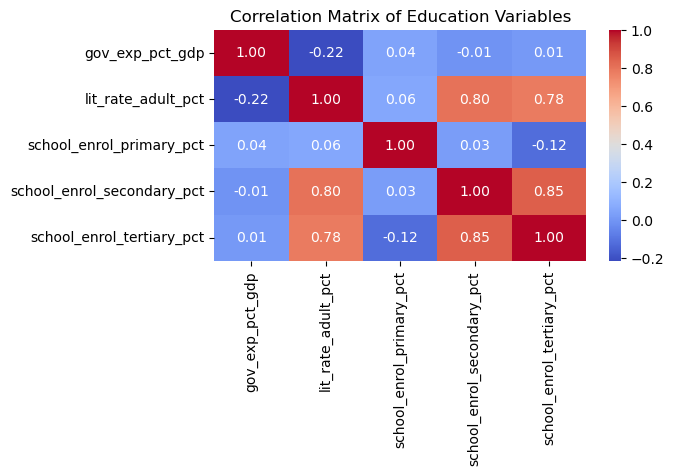

In [111]:
plt.figure(figsize=(6, 3))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Education Variables")
plt.show()

The results may have some problems in supporting **Hypothesis 1**. The correlation between `gov_exp_pct_gdp` and `lit_rate_adult_pct` is weakly negative (-0.217), suggesting that higher government spending on education does not necessarily correspond to higher adult literacy rates, and other factors might be influencing literacy. Similarly, the correlations between `gov_exp_pct_gdp` and `school_enrol_x_pct` across primary, secondary, and tertiary levels are very weak, with values of 0.043, -0.009, and 0.008, respectively. These near-zero correlations imply that government expenditure as a percentage of GDP has minimal direct impact on school enrollment rates.

One key reason for the lack of support could be the high number of missing values in the dataset. Missing data reduces the sample size available for analysis and may introduce bias if the missing values are not random (e.g., certain regions or income levels are underrepresented). This limitation might obscure the true relationships between variables.

Additionally, using government expenditure as a percentage of GDP (`gov_exp_pct_gdp`) as a measure of investment in education could introduce complications. This metric does not capture absolute spending levels or variations in GDP sizes across regions. For example, a country with a small GDP and a high percentage allocation might still spend less on education in absolute terms compared to a country with a large GDP but a lower percentage allocation. As such, this measure may not accurately reflect the actual resources devoted to education, potentially weakening observed correlations.

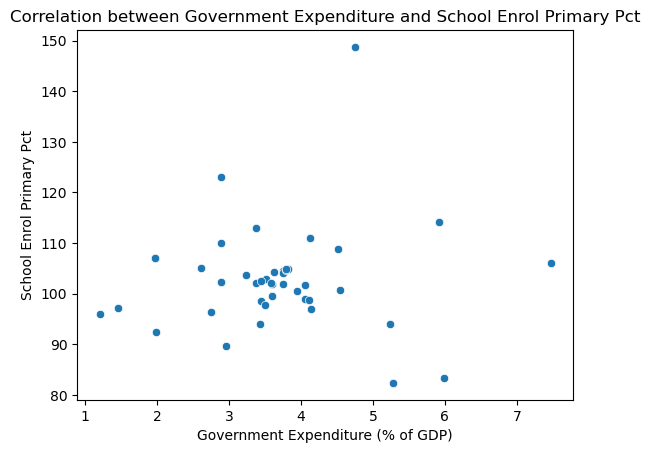

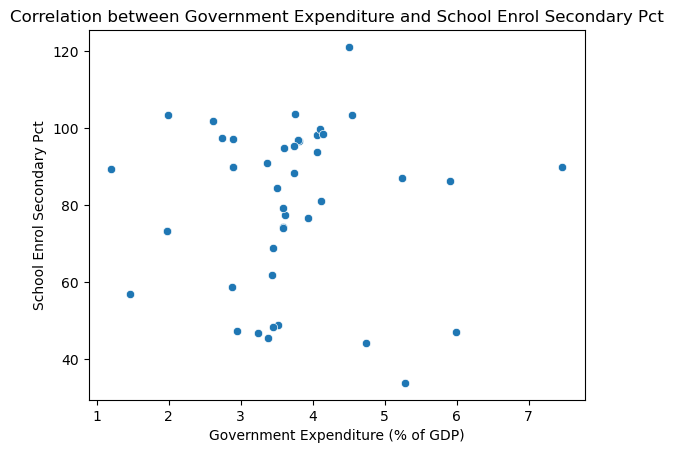

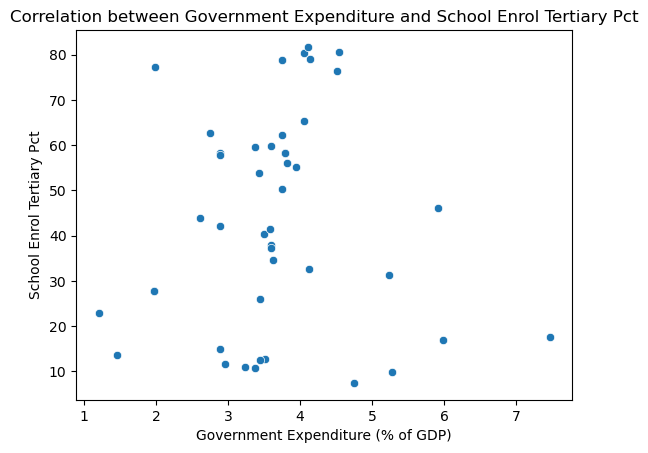

In [115]:
correlations_to_test = ['school_enrol_primary_pct', 'school_enrol_secondary_pct', 'school_enrol_tertiary_pct']

for col in correlations_to_test:
    # Scatterplot for each enrollment rate vs government expenditure
    sns.scatterplot(x='gov_exp_pct_gdp', y=col, data=corr)
    plt.title(f"Correlation between Government Expenditure and {col.replace('_', ' ').title()}")
    plt.xlabel("Government Expenditure (% of GDP)")
    plt.ylabel(col.replace('_', ' ').title())
    plt.show()

The analysis overall supports **Hypothesis 2**, which posited that the positive correlation between `gov_exp_pct_gdp` and `school_enrol_x_pct` would weaken as the education level progresses from primary to tertiary. 

Specifically, the correlation between `gov_exp_pct_gdp` and `school_enrol_primary_pct` is 0.043, which is weakly positive. However, the correlations with `school_enrol_secondary_pct` (-0.009) and `school_enrol_tertiary_pct` (0.008) are almost negligible, indicating a diminishing relationship as the education level increases. This trend aligns with the hypothesis, suggesting that government expenditure may have a stronger impact on primary enrollment rates, while its influence diminishes for higher education levels. 

This pattern could be due to several factors, such as the higher costs associated with secondary and tertiary education, socio-economic barriers to accessing higher education, or variations in how government spending is allocated across different education levels. Thus, while the overall relationship between government expenditure and enrollment rates is weak, the hypothesized trend of weakening correlations is evident in the data.

# Summary: 

Our question was to explore the relationship between government expenditure on education as a percentage of GDP (`gov_exp_pct_gdp`), adult literacy rates (`lit_rate_adult_pct`), and school enrollment rates at different levels (`school_enrol_primary_pct`, `school_enrol_secondary_pct`, `school_enrol_tertiary_pct`). 


Two hypotheses were tested:\
**Hypothesis 1:** `gov_exp_pct_gdp` is positively correlated with both `lit_rate_adult_pct` and all three enrollment rates.\
**Hypothesis 2:** The positive correlation between `gov_exp_pct_gdp` and enrollment rates weakens as the education level progresses from primary to tertiary.


Findings:\
**Hypothesis 1 was not supported:** The correlations between `gov_exp_pct_gdp` and the other variables were weak or negligible, with `lit_rate_adult_pct` (-0.217), `school_enrol_primary_pct` (0.043), `school_enrol_secondary_pct` (-0.009), and `school_enrol_tertiary_pct` (0.008). Missing data in the dataset likely impacted the reliability of these correlations. Additionally, using `gov_exp_pct_gdp` as a measure of educational investment may not fully capture actual spending or its impact, especially given variations in absolute GDP sizes across regions.\
**Hypothesis 2 was supported:** The positive correlation between `gov_exp_pct_gdp` and enrollment rates weakened as education levels progressed. The correlation was strongest for primary enrollment (0.043) and diminished for secondary (-0.009) and tertiary (0.008) levels. This trend aligns with the hypothesis, suggesting that government spending has a more direct impact on primary education than on higher education levels.


Our answer highlights the complexity of the relationship between government education expenditure and educational outcomes. While higher government spending is often expected to improve literacy and enrollment rates, the weak correlations observed suggest that other factors, such as socio-economic conditions, allocation of funds, and systemic inefficiencies, may play a significant role. Further research could benefit from using more robust measures of educational investment and addressing missing data to provide deeper insights.